In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
from trueskill import TrueSkill, Rating
df = pd.read_csv('example_data/Game Data - Data.csv')
df2 = df.astype(object).where(pd.notnull(df),None)
boys = df2.columns[1:]


In [2]:
df2

,Game,Auðun,Árni,Hlynur,Kári,Skossi,Sævar,Örn
0,Lords of Waterdeep,2.0,3.0,5.0,4.0,1.0,6.0,None
1,Viticulture,3.0,2.0,1.0,4.0,6.0,5.0,None
2,Ark Nova,None,2.0,3.0,None,1.0,4.0,None
3,Ark Nova,4.0,None,2.0,3.0,1.0,None,None
4,Everdell,None,1.0,4.0,3.0,None,2.0,None
5,Lost Ruins of Arnak,1.0,2.0,4.0,None,None,3.0,None
6,Ark Nova,None,None,2.0,3.0,1.0,4.0,None
7,Ark Nova,1.0,3.0,2.0,None,None,4.0,None
8,Funkenschlag,3.0,1.0,5.0,6.0,2.0,4.0,None
9,Dune Imperium,4.0,1.0,2.0,None,None,3.0,None


In [3]:
def get_index_dict(lst):
    """
    Returns a dictionary with the numbers in the given list as keys and
    their indices in the list as values.

    Args:
        lst (list): A list of numbers.

    Returns:
        dict: A dictionary with the numbers as keys and their indices as values.
    """
    index_dict = {}
    for i, num in enumerate(lst):
        if num not in index_dict:
            index_dict[num] = [i]
        else:
            index_dict[num].append(i)
    return index_dict

def get_ordinality(lst):
    """
    Returns a list of ordinality for the given list of numbers.

    Args:
        lst (list): A list of numbers.

    Returns:
        list: A list of ordinality for the given list of numbers.
    """
    sorted_lst = sorted(list(set(lst)))
    ordinality = [sorted_lst.index(num) for num in lst]
    return ordinality

def fix_ties_and_teams(ranks, rating_groups):
    index_dict = get_index_dict(ranks)
    unfixed_ranks = []
    fixed_rating_groups = []
    group_indices = []
    for i in index_dict:
        unfixed_ranks.append(i)
        lst=[]
        lst_indices = []
        for j in index_dict[i]:
           lst.append(rating_groups[j][0]) 
           lst_indices.append(j)
        fixed_rating_groups.append(lst)
        group_indices.append(lst_indices)
    return get_ordinality(unfixed_ranks), fixed_rating_groups, group_indices

In [4]:
import copy
def pad_rating_groups(rating_groups):
    rgroups = copy.deepcopy(rating_groups)
    max_groupsize = -1
    for i in rgroups:
        if len(i) > max_groupsize:
            max_groupsize = len(i)
    for i in rgroups:
        while len(i) < max_groupsize:
            i.append(Rating())
    return rgroups


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
2
1
1
1
2
1
1
1
1
1
1
1
3
3
1
1
1
1
1
1
1
1
1
1
1
1
3
4
3
4
2
5
5
2


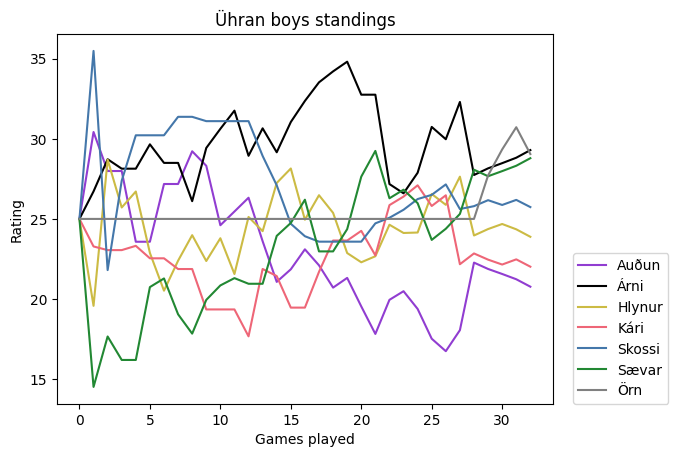

In [5]:
env = TrueSkill(tau=1.5)  
ratings_dict = {'Auðun'  : [Rating()], 
                'Árni'   : [Rating()], 
                'Hlynur' : [Rating()], 
                'Kári'   : [Rating()], 
                'Skossi' : [Rating()],
                 'Sævar' : [Rating()], 
                 'Örn'   : [Rating()]}

for index, row in df2.iterrows():
    dictrow = dict(row)
    rating_groups = []
    ranks = []
    participating_boys = []
    for boy_name in ratings_dict:
        if dictrow[str(boy_name)] is not None:
            participating_boys.append(boy_name)
            rating_groups.append([ratings_dict[boy_name][-1]])
            ranks.append(int(dictrow[str(boy_name)]))
        else:
            ratings_dict[boy_name].append(ratings_dict[boy_name][-1])
    old_ranks = ranks

    ranks, rating_groups, group_indices = fix_ties_and_teams(ranks, rating_groups)
    rating_groups = pad_rating_groups(rating_groups)
    rated_rating_groups = env.rate(rating_groups, ranks=ranks)
    #print(dictrow['Game'])
    #print("o", old_ranks)
    #print("rr", ranks, "\n")
    #print("rateds", rated_rating_groups)
    #print("gin", group_indices)
    for j, group in enumerate(group_indices):
        for k, i in enumerate(group):
            ratings_dict[participating_boys[i]].append(rated_rating_groups[j][k])

    #for i, boy_name in enumerate(participating_boys):
    #    ratings_dict[boy_name].append(rated_rating_groups[i][0])
#print("c", rated_rating_groups)
#print("d:" , ratings_dict)
scores_mu = {}
scores_sigma = {}
colors=['#913DD1', '#000000', '#CCBB44', '#EE6677', '#4477AA', '#228833', 'Grey']
for i, boy in enumerate(ratings_dict):
    scores_mu[boy] = [float(i.mu) for i in ratings_dict[boy]]
    scores_sigma[boy] = [float(i.sigma) for i in ratings_dict[boy]]

df = pd.DataFrame(scores_mu)
df.plot(color=colors)
plt.legend(loc=(1.04, 0))
plt.xlabel("Games played")
plt.ylabel("Rating")
plt.title("Ühran boys standings")
plt.show()


Highlighting the variance of Auðun


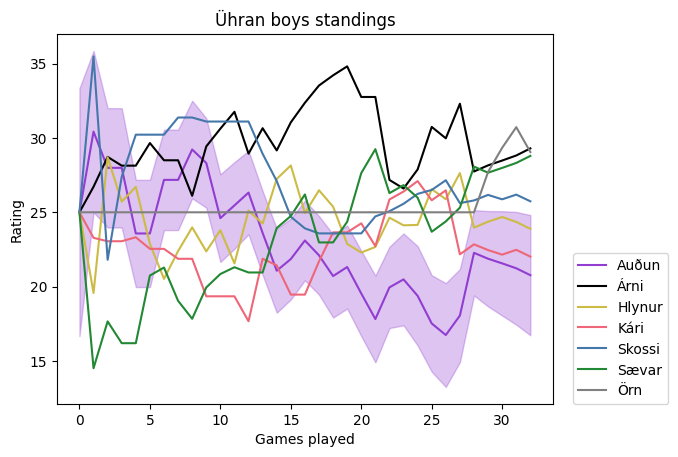

Highlighting the variance of Árni


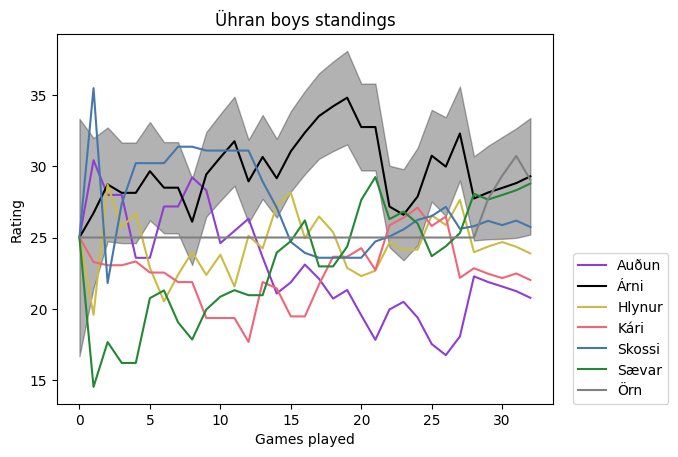

Highlighting the variance of Hlynur


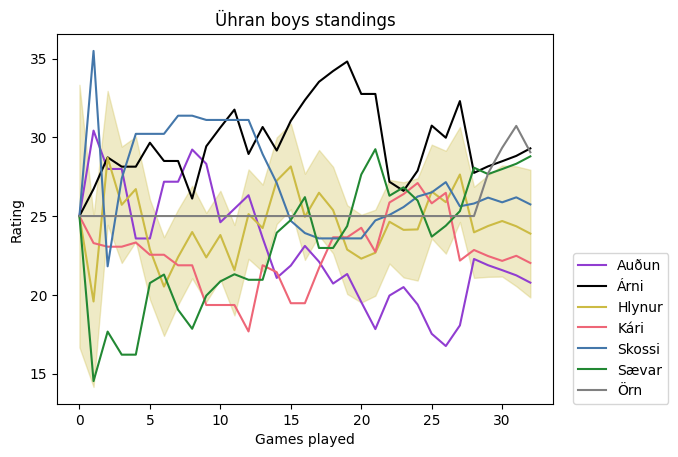

Highlighting the variance of Kári


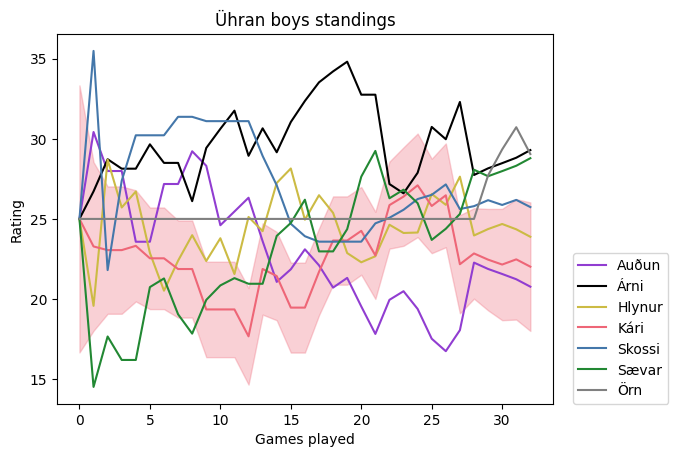

Highlighting the variance of Skossi


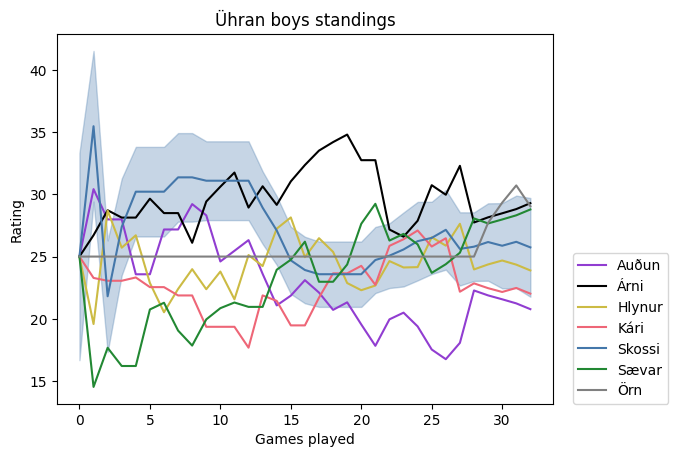

Highlighting the variance of Sævar


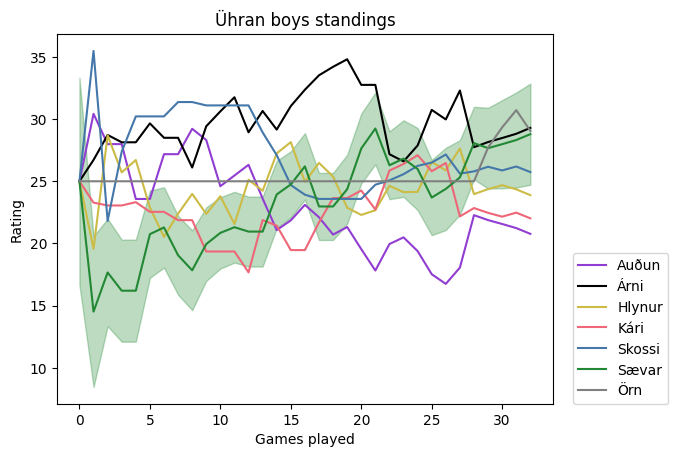

Highlighting the variance of Örn


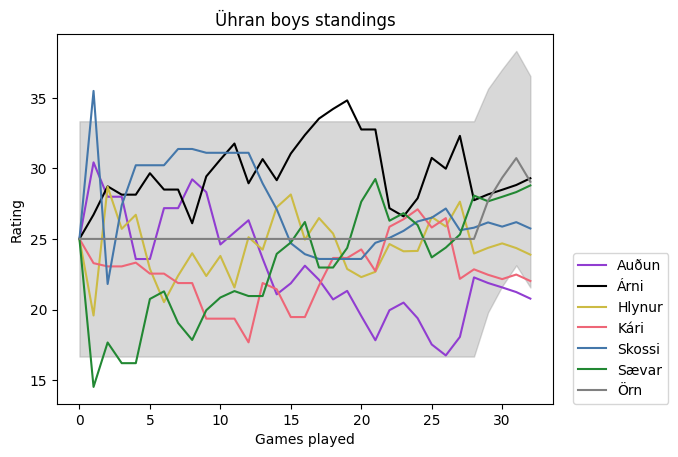

In [6]:
scores_mu = {}
scores_sigma = {}
colors=['#913DD1', '#000000', '#CCBB44', '#EE6677', '#4477AA', '#228833', 'Grey']
for i, boy in enumerate(ratings_dict):
    scores_mu[boy] = [float(i.mu) for i in ratings_dict[boy]]
    scores_sigma[boy] = [float(i.sigma) for i in ratings_dict[boy]]

df = pd.DataFrame(scores_mu)
for i, boy_name in enumerate(boys):
    print(f"Highlighting the variance of {boy_name}")
    df.plot(color=colors)
    plt.fill_between(range(0, len(df)), 
                     np.array(df[boy_name]-pd.DataFrame(scores_sigma)[boy_name]),
                     np.array(df[boy_name]+pd.DataFrame(scores_sigma)[boy_name]), alpha=0.3, color=colors[i])
    plt.legend(loc=(1.04, 0))
    plt.xlabel("Games played")
    plt.ylabel("Rating")
    plt.title("Ühran boys standings")
    plt.show()